In [328]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
import numpy as np


In [330]:
# Cell 2: Load Excel dataset
df = pd.read_csv('../prri_christian_nationalism_2023.csv')
df.head()

,RESPID,SNO,ANO,WEIGHT,COMPLETE_STATUS,SAMPLE_TYPE,KIDAGES_1,KIDAGES_2,KIDAGES_3,KIDAGES_4,...,PPPA1905,PPPA1653,XPPRACEM,XPPP20122,XPPP20117,DOV_FORM,I_RELIGION,I_EDUC,I_GENDER,I_INCOME
0,120100001,25202,68569,0.7899,qualified,1,NaN,NaN,NaN,NaN,...,0.0,-1,1.0,1.0,1.0,1,1.0,3,1,6.0
1,120100002,25202,68568,0.6677,qualified,1,NaN,NaN,NaN,NaN,...,0.0,-1,1.0,2.0,1.0,1,2.0,3,2,5.0
2,120100003,25202,68568,0.3891,qualified,1,NaN,NaN,NaN,NaN,...,0.0,-1,1.0,4.0,2.0,1,3.0,5,1,6.0
3,12120011,25202,68569,1.4393,qualified,1,-1.0,1.0,-1.0,-1.0,...,0.0,-1,1.0,4.0,2.0,1,3.0,2,2,6.0
4,120100004,25202,68568,0.6366,qualified,1,NaN,NaN,NaN,NaN,...,0.0,-1,1.0,4.0,2.0,2,1.0,3,1,4.0


In [332]:
df.info

<bound method DataFrame.info of          RESPID    SNO    ANO  WEIGHT COMPLETE_STATUS  SAMPLE_TYPE  KIDAGES_1  \
0     120100001  25202  68569  0.7899       qualified            1        NaN   
1     120100002  25202  68568  0.6677       qualified            1        NaN   
2     120100003  25202  68568  0.3891       qualified            1        NaN   
3      12120011  25202  68569  1.4393       qualified            1       -1.0   
4     120100004  25202  68568  0.6366       qualified            1        NaN   
...         ...    ...    ...     ...             ...          ...        ...   
6207   12136564  25202  12345  0.7277       qualified            3        NaN   
6208   12136565  25202  12345  0.7048       qualified            3        NaN   
6209   12136566  25202  12345  0.6897       qualified            3        1.0   
6210   12136567  25202  12345  0.7582       qualified            3       -1.0   
6211   12136568  25202  12345  0.8656       qualified            3        1.0

In [334]:
df.columns

Index(['RESPID', 'SNO', 'ANO', 'WEIGHT', 'COMPLETE_STATUS', 'SAMPLE_TYPE',
       'KIDAGES_1', 'KIDAGES_2', 'KIDAGES_3', 'KIDAGES_4',
       ...
       'PPPA1905', 'PPPA1653', 'XPPRACEM', 'XPPP20122', 'XPPP20117',
       'DOV_FORM', 'I_RELIGION', 'I_EDUC', 'I_GENDER', 'I_INCOME'],
      dtype='object', length=132)

In [336]:
df[['PPWORKA', 'I_EDUC', 'PPAGE', 'I_GENDER', 'PPETHM', 'I_INCOME', 'I_RELIGION']].head()


,PPWORKA,I_EDUC,PPAGE,I_GENDER,PPETHM,I_INCOME,I_RELIGION
0,1,3,54,1,4,6.0,1.0
1,3,3,57,2,1,5.0,2.0
2,6,5,70,1,1,6.0,3.0
3,2,2,63,2,1,6.0,3.0
4,6,3,79,1,1,4.0,1.0


In [338]:
for col in ['PPWORKA', 'I_EDUC', 'PPAGE', 'I_GENDER', 'PPETHM', 'I_INCOME', 'I_RELIGION']:
    print(f"{col}: {df[col].dropna().unique()}")


PPWORKA: [ 1  3  6  2  9  7  4  5 -1  8]
I_EDUC: [3 5 2 4 1]
PPAGE: [54 57 70 63 79 68 65 53 85 84 64 82 80 28 62 59 74 55 25 67 43 45 61 71
 75 77 44 46 56 66 52 73 81 34 78 83 60 31 91 30 69 49 51 50 42 72 32 33
 88 58 37 86 41 47 76 87 93 29 48 20 90 40 89 38 26 35 94 36 39 24 27 22
 23 19 21 92 18]
I_GENDER: [1 2]
PPETHM: [4 1 2 3 5]
I_INCOME: [6. 5. 4. 2. 3. 1.]
I_RELIGION: [1. 2. 3. 4.]


In [340]:
#maps variable values to descriptions of outcomes 
ppworka_map = {
    1: "Working - as a paid employee",
    2: "Working - self-employed",
    3: "Not working - on temporary layoff from a job",
    4: "Not working - looking for work",
    5: "Not working - retired",
    6: "Not working - disabled",
    7: "Not working - other",
    8: "Refused",
    -1: "Skipped"
}
ieduc_map = {
    1: "Less than high school",
    2: "High school graduate",
    3: "Some college/Associate degree",
    4: "Bachelor’s degree",
    5: "Postgraduate degree"
}
igender_map = {
    1: "Male",
    2: "Female"
}
ppethm_map = {
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian/Pacific Islander",
    5: "Other/Mixed"
}
iincome_map = {
    1: "Less than $20k",
    2: "$20k–$39k",
    3: "$40k–$59k",
    4: "$60k–$79k",
    5: "$80k–$99k",
    6: "$100k or more"
}
ireligion_map = {
    1: "Evangelical Protestant",
    2: "Mainline Protestant",
    3: "Catholic",
    4: "Other/None"
}


In [342]:
#map and replace the numerical values above with their corres. variable values 
df['PPWORKA_LABEL'] = df['PPWORKA'].map(ppworka_map)
df['I_EDUC_LABEL'] = df['I_EDUC'].map(ieduc_map)
df['I_GENDER_LABEL'] = df['I_GENDER'].map(igender_map)
df['PPETHM_LABEL'] = df['PPETHM'].map(ppethm_map)
df['I_INCOME_LABEL'] = df['I_INCOME'].map(iincome_map)
df['I_RELIGION_LABEL'] = df['I_RELIGION'].map(ireligion_map)

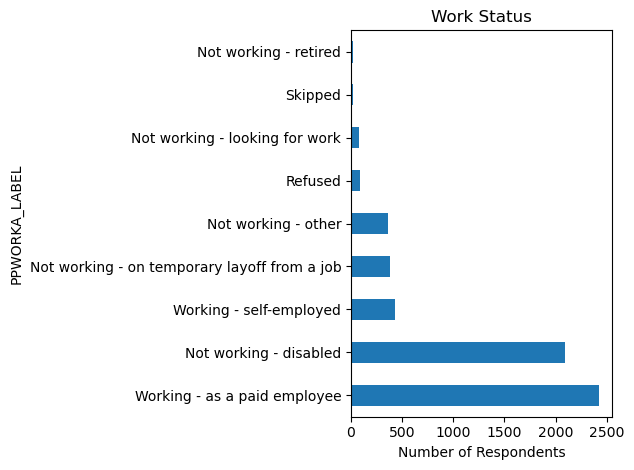

In [344]:
df['PPWORKA_LABEL'].value_counts().plot(kind='barh', title="Work Status")
plt.xlabel("Number of Respondents")
plt.tight_layout()
plt.show()

In [346]:
pd.crosstab(df['PPWORKA_LABEL'], df['I_RELIGION_LABEL'], normalize='columns') * 100


I_RELIGION_LABEL,Catholic,Evangelical Protestant,Mainline Protestant,Other/None
PPWORKA_LABEL,,,,
Not working - disabled,29.870130,39.247693,41.250606,27.790096
Not working - looking for work,2.597403,1.206529,0.920989,1.256467
Not working - on temporary layoff from a job,6.793207,5.251952,6.059137,8.056171
Not working - other,7.992008,5.606813,5.962191,5.469327
Not working - retired,0.399600,0.283889,0.290839,0.147820
Refused,1.498501,1.490419,0.969462,2.217295
Skipped,0.599401,0.141945,0.000000,0.073910
Working - as a paid employee,42.357642,38.821859,37.905962,48.263119
Working - self-employed,7.892108,7.948900,6.640814,6.725795


In [348]:
df.columns

Index(['RESPID', 'SNO', 'ANO', 'WEIGHT', 'COMPLETE_STATUS', 'SAMPLE_TYPE',
       'KIDAGES_1', 'KIDAGES_2', 'KIDAGES_3', 'KIDAGES_4',
       ...
       'I_RELIGION', 'I_EDUC', 'I_GENDER', 'I_INCOME', 'PPWORKA_LABEL',
       'I_EDUC_LABEL', 'I_GENDER_LABEL', 'PPETHM_LABEL', 'I_INCOME_LABEL',
       'I_RELIGION_LABEL'],
      dtype='object', length=138)

In [350]:
cn_items = ['Q43_A', 'Q43_B', 'Q43_C', 'Q43_D', 'Q43_E', 'Q43_G']
df['CN_SCORE'] = df[cn_items].mean(axis=1, skipna=True)

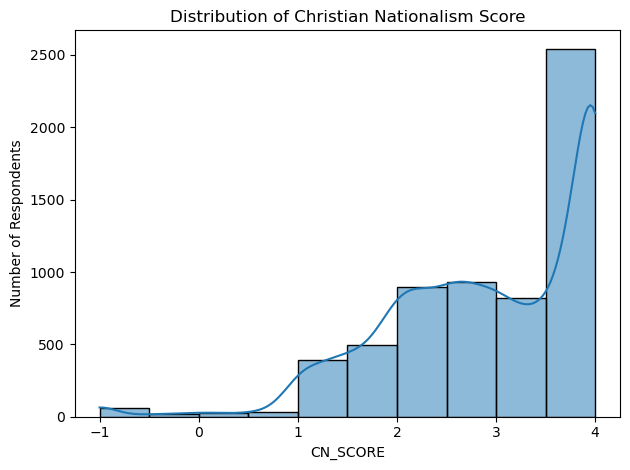

In [352]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['CN_SCORE'], kde=True, bins=10)
plt.title("Distribution of Christian Nationalism Score")
plt.xlabel("CN_SCORE")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

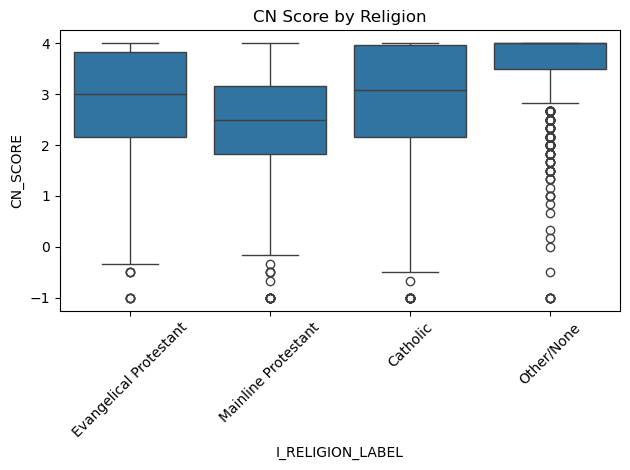

In [354]:
sns.boxplot(data=df, x='I_RELIGION_LABEL', y='CN_SCORE')
plt.xticks(rotation=45)
plt.title("CN Score by Religion")
plt.tight_layout()
plt.show()

In [324]:
"""df = df[[
    'PPWORKA', 'PPWORKA_LABEL',
    'I_EDUC', 'I_EDUC_LABEL',
    'PPAGE',
    'I_GENDER', 'I_GENDER_LABEL',
    'PPETHM', 'PPETHM_LABEL',
    'I_INCOME', 'I_INCOME_LABEL',
    'I_RELIGION', 'I_RELIGION_LABEL'
]]
"""
df = df[[  # Only keep readable label columns + age
    'PPWORKA_LABEL',
    'I_EDUC_LABEL',
    'PPAGE',
    'I_GENDER_LABEL',
    'PPETHM_LABEL',
    'I_INCOME_LABEL',
    'I_RELIGION_LABEL'
]]
df.head()

,PPWORKA_LABEL,I_EDUC_LABEL,PPAGE,I_GENDER_LABEL,PPETHM_LABEL,I_INCOME_LABEL,I_RELIGION_LABEL
0,Working - as a paid employee,Some college/Associate degree,54,Male,Asian/Pacific Islander,$100k or more,Evangelical Protestant
1,Not working - on temporary layoff from a job,Some college/Associate degree,57,Female,White,$80k–$99k,Mainline Protestant
2,Not working - disabled,Postgraduate degree,70,Male,White,$100k or more,Catholic
3,Working - self-employed,High school graduate,63,Female,White,$100k or more,Catholic
4,Not working - disabled,Some college/Associate degree,79,Male,White,$60k–$79k,Evangelical Protestant


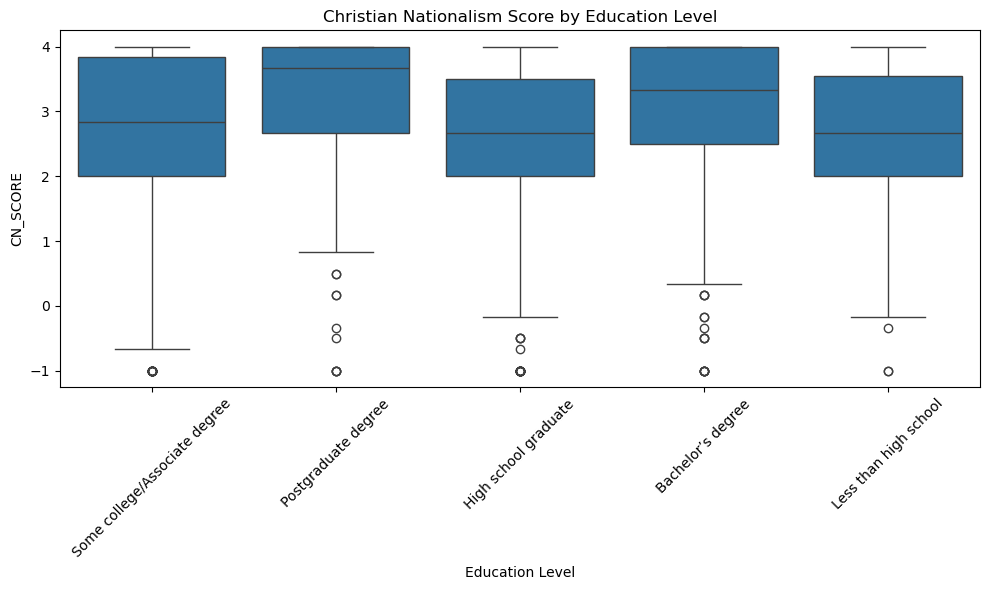

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='I_EDUC_LABEL', y='CN_SCORE')
plt.xticks(rotation=45)
plt.title("Christian Nationalism Score by Education Level")
plt.xlabel("Education Level")
plt.ylabel("CN_SCORE")
plt.tight_layout()
plt.show()


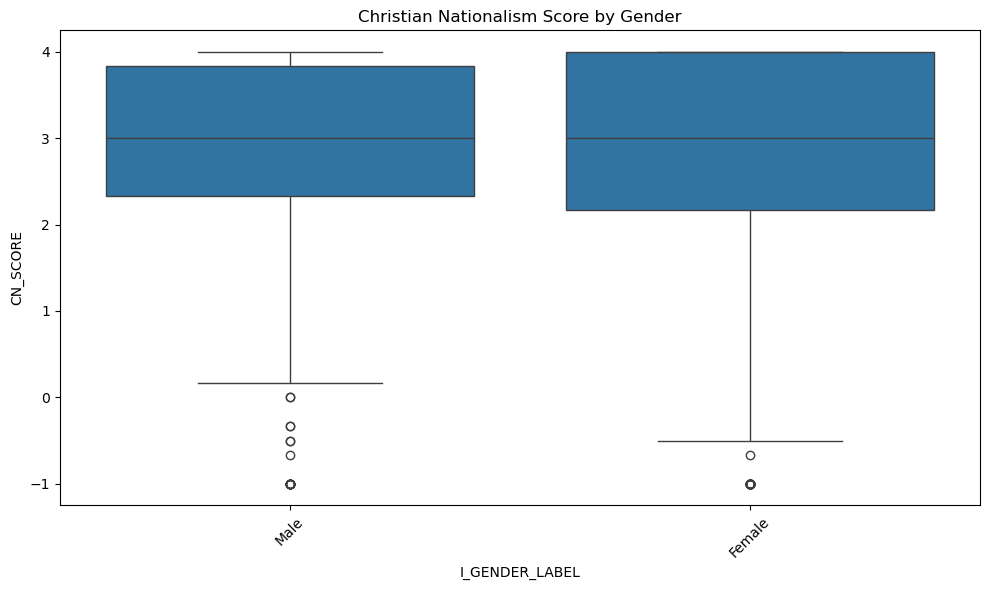

In [360]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='I_GENDER_LABEL', y='CN_SCORE')
plt.xticks(rotation=45)
plt.title("Christian Nationalism Score by Gender")
plt.xlabel("I_GENDER_LABEL")
plt.ylabel("CN_SCORE")
plt.tight_layout()
plt.show()


In [362]:
import sqlite3

# Create a connection to a new SQLite database in memory (or on disk with 'christian_nationalism.db')
conn = sqlite3.connect('cn_analysis.db')

# Write your DataFrame to a SQL table
df.to_sql('cn_data', conn, if_exists='replace', index=False)

6212

In [364]:
query = """
SELECT I_RELIGION_LABEL, AVG(CN_SCORE) AS avg_cn_score
FROM cn_data
GROUP BY I_RELIGION_LABEL
ORDER BY avg_cn_score DESC
"""
pd.read_sql_query(query, conn)


,I_RELIGION_LABEL,avg_cn_score
0,Other/None,3.619723
1,Catholic,2.904829
2,Evangelical Protestant,2.893279
3,Mainline Protestant,2.505416
4,None,1.688889


In [366]:
query = """
SELECT I_INCOME_LABEL, COUNT(*) AS num_respondents
FROM cn_data
GROUP BY I_INCOME_LABEL
ORDER BY num_respondents DESC
"""
pd.read_sql_query(query, conn)

,I_INCOME_LABEL,num_respondents
0,None,1176
1,$40k–$59k,1147
2,$100k or more,1114
3,$60k–$79k,1048
4,$80k–$99k,853
5,$20k–$39k,600
6,Less than $20k,274


In [372]:
query = """
SELECT I_EDUC_LABEL, AVG(CN_SCORE) AS avg_cn_score
FROM cn_data
GROUP BY I_EDUC_LABEL
ORDER BY avg_cn_score DESC
"""
pd.read_sql_query(query, conn)

,I_EDUC_LABEL,avg_cn_score
0,Postgraduate degree,3.273561
1,Bachelor’s degree,3.130152
2,Some college/Associate degree,2.766773
3,Less than high school,2.656095
4,High school graduate,2.595311


In [374]:
conn.close()
